# Estudo Sistemático das Forças Intermoleculares em Sistemas Simples

Neste exercício você irá estudar uma série de complexos de van der Waals homo e heteronucleares, envolvendo diversas espécies químicas simples para entender quais forças intermoleculares são dominantes neste tipo de sistema. Escolheremos moléculas polares e apolares, faremos a combinação entre elas. Por fim, veremos como moléculas polares e apolares interagem com íons, pois esta situação é muito comum em soluções.

Vamos começar estudando um par de moléculas polares. Escolhi a molécula diatômica HF posicionando o dímero ao longo do eixo z. Desta forma, nossa coordenada para construir a curva de energia potencial será feita posicionando um átomo de Flúor da molécula A na origem $(0,0,0)$ e a molécula B terá sua coordenada z incrementada $(0,0,R)$. Abaixo vemos a representação tridimensional deste dímero. 

<div>
<img src="HF_dimer.png" width="500"/>
</div>




In [70]:
import sys; sys.path.append("/usr/lib/x86_64-linux-gnu/") 
import time
import numpy as np
import scipy
from scipy.optimize import *
np.set_printoptions(precision=5, linewidth=200, threshold=2000, suppress=True)
import psi4
import matplotlib.pyplot as plt

# Set Psi4 & NumPy Memory Options
# Set Psi4 & NumPy Memory Options
psi4.set_memory('2 GB')
psi4.core.set_output_file('general_sapt.dat', True)

numpy_memory = 2

psi4.set_options({'basis': 'jun-cc-pVDZ',
              'scf_type': 'df',
              'freeze_core': 'true',
              'e_convergence': 1e-6,
              'd_convergence': 1e-6,})

In [66]:
# distâncias de interesse em angstrons
dist_hf = np.arange(2.0,10.0,0.5)
# listas de energias com zeros
eelst_hf = np.zeros((len(dist_hf)))
eind_hf = np.zeros((len(dist_hf)))
edisp_hf = np.zeros((len(dist_hf)))
eexch_hf = np.zeros((len(dist_hf)))
esapt_hf = np.zeros((len(dist_hf)))

In [67]:
psi4.core.set_output_file('general_sapt.dat', True)
for i in range(len(dist_hf)):
  dimer_hf = """
  0 1
  F                  0.00000000    0.00000000    0.00000000
  H                  0.00000000    0.00000000   -0.88000000
  --
  0 1
  F                  0.00000000    0.00000000    """ + str(dist_hf[i]) + """
  H                  0.00000000    0.00000000   """ + str((dist_hf[i]-0.880000)) + """
  units angstrom
  symmetry c1
  """
  # constroi a molécula
  psi4.geometry(dimer_hf)

  psi4.energy('sapt0')
  eelst_hf[i] = psi4.variable('SAPT ELST ENERGY') * 627.509
  eexch_hf[i] = psi4.variable('SAPT EXCH ENERGY') * 627.509
  eind_hf[i] = psi4.variable('SAPT IND ENERGY') * 627.509
  edisp_hf[i] = psi4.variable('SAPT DISP ENERGY') * 627.509
  esapt_hf[i] = psi4.variable('SAPT TOTAL ENERGY') * 627.509
  psi4.core.clean()

  

Agora vamos construir a curva de energia potencial para a interação HF-HF. Obs: $R$ neste caso presenta a distância entre o Flúor da molécula A com o Flúor da molécula B em Angströms.

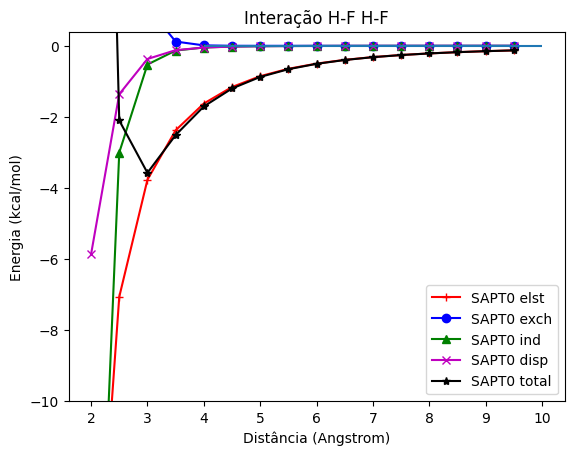

In [68]:
plt.close()
plt.ylim(-10.0,0.4)
plt.plot(dist_hf,eelst_hf,'r+',linestyle='-',label='SAPT0 elst')
plt.plot(dist_hf,eexch_hf,'bo',linestyle='-',label='SAPT0 exch')
plt.plot(dist_hf,eind_hf,'g^',linestyle='-',label='SAPT0 ind')
plt.plot(dist_hf,edisp_hf,'mx',linestyle='-',label='SAPT0 disp')
plt.plot(dist_hf,esapt_hf,'k*',linestyle='-',label='SAPT0 total')
plt.hlines(0.0,4.0,10.0)
plt.legend(loc='best')
plt.xlabel('Distância (Angstrom)')
plt.ylabel('Energia (kcal/mol)')
plt.title('Interação H-F H-F')
plt.show()

*Questionamentos*

1 - Qual é a contribuição dominante para a interação HF-HF na orientação que escolhemos?

2 - Copie o código do cálculo dos percentuais que fizemos no caderno Water_SAPT.ipynb para quantificar esta análise.

3 - Em relação ao dímero de água que vimos que as ligações de hidrogênio são dominadas por interações elestrostáticas, o cenário muda para o caso presente?

Vamos agora estudar duas moléculas apolares. Escolherei a interação entre moléculas de benzeno. O benzeno foi escolhido por apresentar um tipo muito interessante de interçaões intermoleculares importantes em diversos campos científicos chamado de *empilhamento $\pi$* ou *$\pi* stacking*. O empilhamento em química supramolecular refere-se a um arranjo empilhado frequentemente de moléculas aromáticas, que são adotadas devido às interações interatômicas. O exemplo mais comum de um sistema de empilhamento é encontrado por pares de bases consecutivos de DNA. Neste exercício vamos confirmar o comportamento da natureza nesta classe de compostos que indica que a interação é mais estável quando os grupos aromáticos estão voltados face-a-face do que outra possível orientação.

Na figura abaixo estão apresentados as duas orientações que iremos considerar dos dímeros de benzeno.


<div>
<img src="benzene_dimers.png" width="500"/>
</div>

Iremos afastar no caso A as moléculas ao longo do eixo y e no caso B ao longo do eixo x. Escolherei distâncias entre os centros de massa de $R=3.5$ até $R=7.0$ Angstroms para o caso A e de $R=7.0$ até $R=10.0$. No meu computador este cálculo levou cerca de 10 minutos.

In [71]:
# distâncias de interesse em angstrons
dist_benz1 = np.arange(3.5,7.0,0.4)
# listas de energias com zeros
eelst_benz1 = np.zeros((len(dist_benz1)))
eind_benz1 = np.zeros((len(dist_benz1)))
edisp_benz1 = np.zeros((len(dist_benz1)))
eexch_benz1 = np.zeros((len(dist_benz1)))
esapt_benz1 = np.zeros((len(dist_benz1)))

psi4.core.set_output_file('general_sapt.dat', True)
for i in range(len(dist_benz1)):
  dimer_benz1 = """
  0 1
  C     -1.205074349366     """ + str(dist_benz1[i]) + """    -0.695750000000
  H     -2.140381785453     """ + str(dist_benz1[i]) + """    -1.235750000000
  C     -0.000000000000     """ + str(dist_benz1[i]) + """    -1.391500000000
  H     -0.000000000000     """ + str(dist_benz1[i]) + """    -2.471500000000
  C      1.205074349366     """ + str(dist_benz1[i]) + """    -0.695750000000
  H      2.140381785453     """ + str(dist_benz1[i]) + """    -1.235750000000
  C      1.205074349366     """ + str(dist_benz1[i]) + """     0.695750000000
  H      2.140381785453     """ + str(dist_benz1[i]) + """     1.235750000000
  C     -0.000000000000     """ + str(dist_benz1[i]) + """     1.391500000000
  H     -0.000000000000     """ + str(dist_benz1[i]) + """     2.471500000000
  C     -1.205074349366     """ + str(dist_benz1[i]) + """     0.695750000000
  H     -2.140381785453     """ + str(dist_benz1[i]) + """     1.235750000000
  --
  0 1
  C     -1.205074349366     0.000000000000    -0.695750000000
  H     -2.140381785453     0.000000000000    -1.235750000000
  C     -0.000000000000     0.000000000000    -1.391500000000
  H     -0.000000000000     0.000000000000    -2.471500000000
  C      1.205074349366     0.000000000000    -0.695750000000
  H      2.140381785453     0.000000000000    -1.235750000000
  C      1.205074349366     0.000000000000     0.695750000000
  H      2.140381785453     0.000000000000     1.235750000000
  C     -0.000000000000     0.000000000000     1.391500000000
  H     -0.000000000000     0.000000000000     2.471500000000
  C     -1.205074349366     0.000000000000     0.695750000000
  H     -2.140381785453     0.000000000000     1.235750000000
  units angstrom
  symmetry c1
  """
  # constroi a molécula
  psi4.geometry(dimer_benz1)

  psi4.energy('sapt0')
  eelst_benz1[i] = psi4.variable('SAPT ELST ENERGY') * 627.509
  eexch_benz1[i] = psi4.variable('SAPT EXCH ENERGY') * 627.509
  eind_benz1[i] = psi4.variable('SAPT IND ENERGY') * 627.509
  edisp_benz1[i] = psi4.variable('SAPT DISP ENERGY') * 627.509
  esapt_benz1[i] = psi4.variable('SAPT TOTAL ENERGY') * 627.509
  psi4.core.clean()


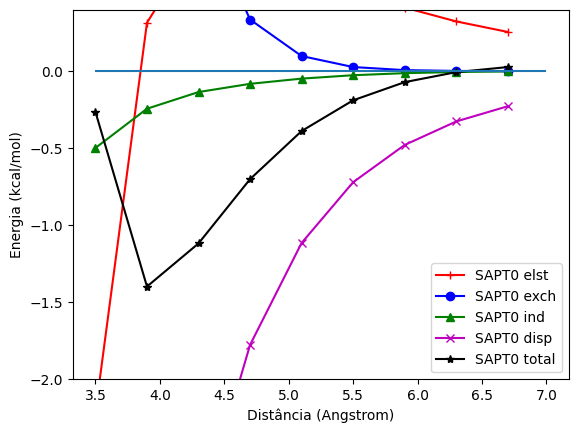

In [79]:
plt.close()
plt.ylim(-2.0,0.4)
plt.plot(dist_benz1,eelst_benz1,'r+',linestyle='-',label='SAPT0 elst')
plt.plot(dist_benz1,eexch_benz1,'bo',linestyle='-',label='SAPT0 exch')
plt.plot(dist_benz1,eind_benz1,'g^',linestyle='-',label='SAPT0 ind')
plt.plot(dist_benz1,edisp_benz1,'mx',linestyle='-',label='SAPT0 disp')
plt.plot(dist_benz1,esapt_benz1,'k*',linestyle='-',label='SAPT0 total')
plt.hlines(0.0,3.5,7.0)
plt.legend(loc='best')
plt.xlabel('Distância (Angstrom)')
plt.ylabel('Energia (kcal/mol)')
plt.title('Aproximação de Empilhamento')
plt.show()

Agora para o Caso B (aproximação lateral)

In [81]:
# distâncias de interesse em angstrons
dist_benz2 = np.arange(11.0,14.0,0.5)
# listas de energias com zeros
eelst_benz2 = np.zeros((len(dist_benz2)))
eind_benz2 = np.zeros((len(dist_benz2)))
edisp_benz2 = np.zeros((len(dist_benz2)))
eexch_benz2 = np.zeros((len(dist_benz2)))
esapt_benz2 = np.zeros((len(dist_benz2)))

psi4.core.set_output_file('general_sapt.dat', True)
for i in range(len(dist_benz2)):
  dimer_benz2 = """
  0 1
  C     """ + str(dist_benz2[i]-3.79492565) + """  0.000000000000  -0.695750000000
  H     """ + str(dist_benz2[i]-2.85961821) + """  0.000000000000  -1.235750000000
  C     """ + str(dist_benz2[i]-5.00000000) + """  0.000000000000  -1.391500000000
  H     """ + str(dist_benz2[i]-5.00000000) + """  0.000000000000  -2.471500000000
  C     """ + str(dist_benz2[i]-6.20507435) + """  0.000000000000  -0.695750000000
  H     """ + str(dist_benz2[i]-7.14038179) + """  0.000000000000  -1.235750000000
  C     """ + str(dist_benz2[i]-6.20507435) + """  0.000000000000   0.695750000000
  H     """ + str(dist_benz2[i]-7.14038179) + """  0.000000000000   1.235750000000
  C     """ + str(dist_benz2[i]-5.00000000) + """  0.000000000000   1.391500000000
  H     """ + str(dist_benz2[i]-5.00000000) + """  0.000000000000   2.471500000000
  C     """ + str(dist_benz2[i]-3.79492565) + """  0.000000000000   0.695750000000
  H     """ + str(dist_benz2[i]-2.85961821) + """  0.000000000000   1.235750000000
  --
  0 1
  C     -1.205074349366     0.000000000000    -0.695750000000
  H     -2.140381785453     0.000000000000    -1.235750000000
  C     -0.000000000000     0.000000000000    -1.391500000000
  H     -0.000000000000     0.000000000000    -2.471500000000
  C      1.205074349366     0.000000000000    -0.695750000000
  H      2.140381785453     0.000000000000    -1.235750000000
  C      1.205074349366     0.000000000000     0.695750000000
  H      2.140381785453     0.000000000000     1.235750000000
  C     -0.000000000000     0.000000000000     1.391500000000
  H     -0.000000000000     0.000000000000     2.471500000000
  C     -1.205074349366     0.000000000000     0.695750000000
  H     -2.140381785453     0.000000000000     1.235750000000
  units angstrom
  symmetry c1
  """
  # constroi a molécula
  psi4.geometry(dimer_benz1)

  psi4.energy('sapt0')
  eelst_benz2[i] = psi4.variable('SAPT ELST ENERGY') * 627.509
  eexch_benz2[i] = psi4.variable('SAPT EXCH ENERGY') * 627.509
  eind_benz2[i] = psi4.variable('SAPT IND ENERGY') * 627.509
  edisp_benz2[i] = psi4.variable('SAPT DISP ENERGY') * 627.509
  esapt_benz2[i] = psi4.variable('SAPT TOTAL ENERGY') * 627.509
  psi4.core.clean()


In [ ]:
plt.close()
plt.ylim(-2.0,0.4)
plt.plot(dist_benz2,eelst_benz2,'r+',linestyle='-',label='SAPT0 elst')
plt.plot(dist_benz2,eexch_benz2,'bo',linestyle='-',label='SAPT0 exch')
plt.plot(dist_benz2,eind_benz2,'g^',linestyle='-',label='SAPT0 ind')
plt.plot(dist_benz2,edisp_benz2,'mx',linestyle='-',label='SAPT0 disp')
plt.plot(dist_benz2,esapt_benz2,'k*',linestyle='-',label='SAPT0 total')
plt.hlines(0.0,3.5,7.0)
plt.legend(loc='best')
plt.xlabel('Distância (Angstrom)')
plt.ylabel('Energia (kcal/mol)')
plt.plot('Aproximação Lateral')
plt.show()